In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# --- Generate Complete Features ---
data = {
    'Age': np.random.randint(18, 75, n_samples),
    'Gender': np.random.choice(['Male', 'Female', 'Other'], n_samples, p=[0.48, 0.48, 0.04]),
    'Loan_Approved': np.random.choice([0, 1], n_samples, p=[0.4, 0.6]) # Target
}
df = pd.DataFrame(data)

# --- 1. Education_Level (MCAR) ---
# Roughly 15% missing values, completely at random
education_options = ['High School', 'Bachelor', 'Master', 'PhD', np.nan]
# Adjust probabilities to get about 15% NaN
# (1-0.15) / 4 for each of the 4 valid options, and 0.15 for NaN
prob_edu_mcar = [(1-0.15)/4]*4 + [0.15]
df['Education_Level'] = np.random.choice(
    ['High School', 'Bachelor', 'Master', 'PhD', np.nan],
    n_samples,
    p=prob_edu_mcar
)

# --- 2. Income (MAR - Missing At Random) ---
# Missingness depends on 'Age'.
# Let's say younger (18-25) and older (60+) people are less likely to report income.
# First, generate full income data
base_income = np.random.normal(loc=50000, scale=15000, size=n_samples)
base_income[base_income < 10000] = 10000 # Floor income
df['Income'] = base_income.copy()

# Probability of income being missing
prob_missing_income = np.zeros(n_samples)
# Higher probability for younger people
prob_missing_income[(df['Age'] >= 18) & (df['Age'] <= 25)] = 0.35 # 35% chance of missing
# Higher probability for older people
prob_missing_income[df['Age'] > 60] = 0.45 # 45% chance of missing
# Lower probability for middle-aged people
prob_missing_income[(df['Age'] > 25) & (df['Age'] <= 60)] = 0.05 # 5% chance of missing

# Introduce missing values based on these probabilities
missing_income_mask = np.random.rand(n_samples) < prob_missing_income
df.loc[missing_income_mask, 'Income'] = np.nan


# --- 3. Self_Reported_Stress_Level (MNAR - Missing Not At Random) ---
# Missingness depends on the value of stress itself.
# People with high stress (e.g., > 7) are less likely to report it.
# First, generate the "true" stress levels
true_stress_levels = np.random.randint(1, 11, n_samples) # Scale 1-10
df['Self_Reported_Stress_Level'] = true_stress_levels.astype(float) # Store as float to allow NaNs

# Probability of stress level being missing
prob_missing_stress = np.zeros(n_samples)
# Very high probability of missing if true stress is high
prob_missing_stress[true_stress_levels > 7] = 0.70 # 70% chance if stress > 7
# Low probability otherwise
prob_missing_stress[true_stress_levels <= 7] = 0.05 # 5% chance if stress <= 7

# Introduce missing values
missing_stress_mask = np.random.rand(n_samples) < prob_missing_stress
df.loc[missing_stress_mask, 'Self_Reported_Stress_Level'] = np.nan

# --- Display dataset info ---
print("Dataset Head:")
print(df.head())
print("\nMissing Value Counts:")
print(df.isnull().sum())
print(f"\nTotal rows: {len(df)}")

print("\n--- Verification of Missingness Mechanisms (Illustrative) ---")

# MCAR: Education_Level
# Distribution of other variables should be similar for missing/non-missing Education_Level
print("\nMCAR Check (Education_Level):")
print("Mean Age where Education is missing:", df[df['Education_Level'].isnull()]['Age'].mean())
print("Mean Age where Education is NOT missing:", df[df['Education_Level'].notnull()]['Age'].mean())
# These should be relatively close.

# MAR: Income
# Missingness of Income depends on Age.
print("\nMAR Check (Income):")
print("Percentage of missing Income for Age <= 25:",
      df[(df['Age'] <= 25)]['Income'].isnull().mean() * 100)
print("Percentage of missing Income for 25 < Age <= 60:",
      df[(df['Age'] > 25) & (df['Age'] <= 60)]['Income'].isnull().mean() * 100)
print("Percentage of missing Income for Age > 60:",
      df[df['Age'] > 60]['Income'].isnull().mean() * 100)
# These should reflect the probabilities we set (0.35, 0.05, 0.45 approximately)


Dataset Head:
   Age  Gender  Loan_Approved Education_Level        Income  \
0   56  Female              1     High School           NaN   
1   69    Male              1     High School           NaN   
2   46  Female              1          Master  29793.105657   
3   32    Male              1             PhD           NaN   
4   60    Male              1     High School  68006.208619   

   Self_Reported_Stress_Level  
0                         7.0  
1                         NaN  
2                         NaN  
3                         5.0  
4                         9.0  

Missing Value Counts:
Age                             0
Gender                          0
Loan_Approved                   0
Education_Level                 0
Income                         98
Self_Reported_Stress_Level    126
dtype: int64

Total rows: 500

--- Verification of Missingness Mechanisms (Illustrative) ---

MCAR Check (Education_Level):
Mean Age where Education is missing: nan
Mean Age where Educatio

In [12]:
df.head(5)

,Age,Gender,Loan_Approved,Education_Level,Income,Self_Reported_Stress_Level
0,56,Female,1,High School,NaN,7.0
1,69,Male,1,High School,NaN,NaN
2,46,Female,1,Master,29793.105657,NaN
3,32,Male,1,PhD,NaN,5.0
4,60,Male,1,High School,68006.208619,9.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         500 non-null    int32  
 1   Gender                      500 non-null    object 
 2   Loan_Approved               500 non-null    int64  
 3   Education_Level             500 non-null    object 
 4   Income                      402 non-null    float64
 5   Self_Reported_Stress_Level  374 non-null    float64
dtypes: float64(2), int32(1), int64(1), object(2)
memory usage: 21.6+ KB


In [13]:
df.isnull().mean()*100

Age                            0.0
Gender                         0.0
Loan_Approved                  0.0
Education_Level                0.0
Income                        19.6
Self_Reported_Stress_Level    25.2
dtype: float64

In [15]:
cols = [var for var in df if df[var].isnull().mean()*100 > 0]
cols

['Income', 'Self_Reported_Stress_Level']

In [28]:
missing[cols].shape

(500, 2)

In [29]:
missing.head()

,Income,Self_Reported_Stress_Level
0,NaN,7.0
1,NaN,NaN
2,29793.105657,NaN
3,NaN,5.0
4,68006.208619,9.0


In [30]:
missing.dropna(inplace=True)

In [33]:
missing.shape

(302, 2)

<Axes: ylabel='Frequency'>

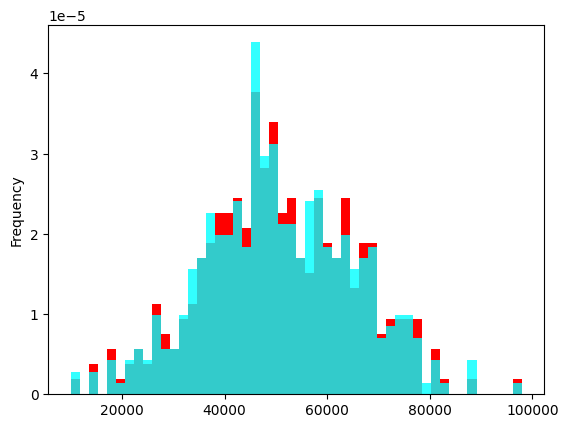

In [34]:
missing['Income'].plot(kind='hist', bins=50, density=True, color='red')
df['Income'].plot(kind='hist', bins=50, density=True, color='cyan', alpha=0.8)

<Axes: ylabel='Frequency'>

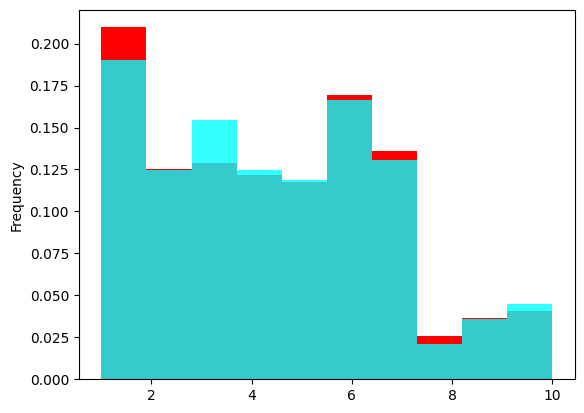

In [39]:
missing['Self_Reported_Stress_Level'].plot(kind='hist', bins=10, density=True, color='red')
df['Self_Reported_Stress_Level'].plot(kind='hist', bins=10, density=True, color='cyan', alpha=0.8)

In [36]:
df['Self_Reported_Stress_Level'].value_counts()

Self_Reported_Stress_Level
1.0     64
6.0     56
3.0     52
7.0     44
2.0     42
4.0     42
5.0     40
10.0    15
9.0     12
8.0      7
Name: count, dtype: int64

In [40]:
temp = pd.concat([
    missing['Self_Reported_Stress_Level'].describe(),
    df['Self_Reported_Stress_Level'].describe()
], axis=1)
temp

,Self_Reported_Stress_Level,Self_Reported_Stress_Level
count,302.000000,374.000000
mean,4.347682,4.358289
std,2.548202,2.515363
min,1.000000,1.000000
25%,2.000000,2.000000
50%,4.000000,4.000000
75%,6.000000,6.000000
max,10.000000,10.000000


### conclusion - the missing data is MCAR but a lot of data is missing to use CCA